In [44]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
import pandas as pd
import numpy as np
import datetime

"""from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt"""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("./data/train.csv")

df = pd.DataFrame(df)

In [45]:
#inspect structure
df_info = df.info()
print("INSPECT STRUCTURE\n",df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
#missing values
missing_values = df.isnull()
missing_count = missing_values.sum()
print("MISSING VALUES \n",missing_count)

MISSING VALUES 
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


### Data Cleaning

In [47]:
"""features = [
    "SalePrice", "MSSubClass", "Utilities", "BldgType", "TotalBsmtSF", "LowQualFinSF",
    "GrLivArea", "FullBath", "HalfBath", "TotRmsAbvGrd",
    "Fireplaces", "GarageArea", "MSZoning", "LotFrontage", "LotArea", "Street",
    "LandContour", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "YearBuilt", "YearRemodAdd", "Heating", "Functional", "PavedDrive"
]
#"['Bedroom', 'Kitchen'] not in index" not found in any dataset
df = df[features]
#df = df.dropna(subset=features, inplace=True)

# Numerical columns, replace missing values with the mean
for column in ['SalePrice', 'MSSubClass', 'TotalBsmtSF', 'GrLivArea']:
    df[column].fillna(df[column].mean(), inplace=True)

# Categorical columns, replace missing values with the mode
for column in ['Utilities', 'BldgType']:
    df[column].fillna(df[column].mode()[0], inplace=True)

print(df)

cleaned_data_info = df.info()"""

sizeFeatures = [
    "MSSubClass", "Utilities", "BldgType", "TotalBsmtSF", "LowQualFinSF",
    "GrLivArea", "FullBath", "HalfBath", "TotRmsAbvGrd",
    "Fireplaces", "GarageArea"
]

locationFeatures = [
    "MSZoning", "LotFrontage", "LotArea", "Street",
    "LandContour", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "YearBuilt", "YearRemodAdd", "Heating", "Functional", "PavedDrive"
]

targetFeature = ["SalePrice"]

selectedData = df[sizeFeatures + locationFeatures + ["SalePrice"]].copy()
print(selectedData.columns)

#types are ordered from worst to best
utilitiesTypes = ["ELO", "NoSeWa", "NoSeWr", "AllPub"]
bldgTypes = ["TwnhsI", "TwnhsE", "Duplx", "2FmCon", "1Fam"]
mszoningTypes = ["A","I","C", "FV", "RH", "RM", "RL", "RP"]
streetTypes = ["Grvl", "Pave"]
landcontourTypes = ["Low", "Lvl", "Bnk", "HLS"]
lotconfigTypes = ["Inside", "Corner", "FR2", "FR3", "CulDSac"]
landslopeTypes = ["Sev", "Mod", "Gtl"]
neighborhoodTypes = []



numericalFeatures = ["MSSubClass", "TotalBsmtSF", "LowQualFinSF",
    "GrLivArea", "FullBath", "HalfBath", "TotRmsAbvGrd",
    "Fireplaces", "GarageArea", "LotFrontage", "LotArea", "GrLivArea"]



count = 0
for column in numericalFeatures:
    selectedData.fillna({column: 0}, inplace=True)
    
selectedData = pd.get_dummies(selectedData) 

print(selectedData.columns)
print(selectedData["SalePrice"])

Index(['MSSubClass', 'Utilities', 'BldgType', 'TotalBsmtSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'YearBuilt', 'YearRemodAdd', 'Heating', 'Functional', 'PavedDrive',
       'SalePrice'],
      dtype='object')
Index(['MSSubClass', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'LotFrontage',
       'LotArea', 'YearBuilt', 'YearRemodAdd', 'SalePrice', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfi

### Applying SVM

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.1s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.1s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.1s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.1s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=rbf; total time=   0.1s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.1s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.1s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.1s
[CV] END model__C=0.1, model__epsilon=0.1, model__gamma=scale, model__kernel=linear; total time=   0.1s
[CV] END model__C

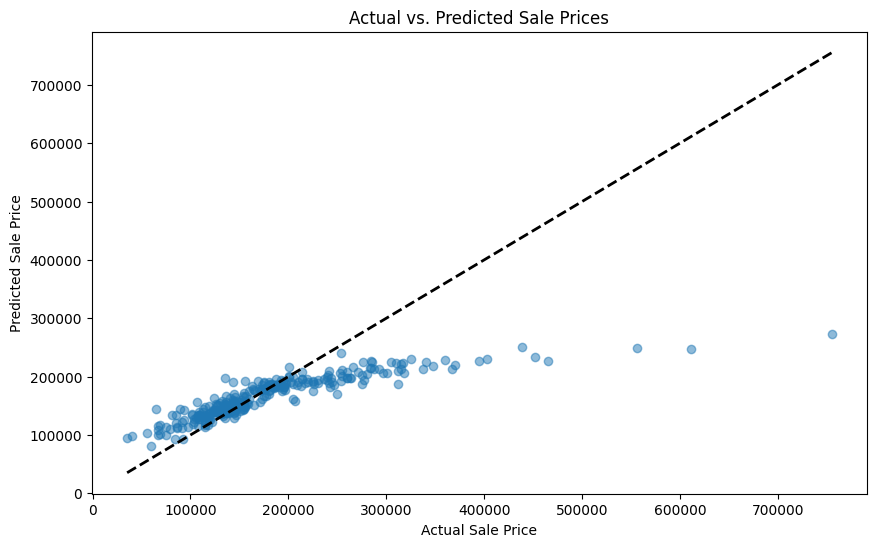

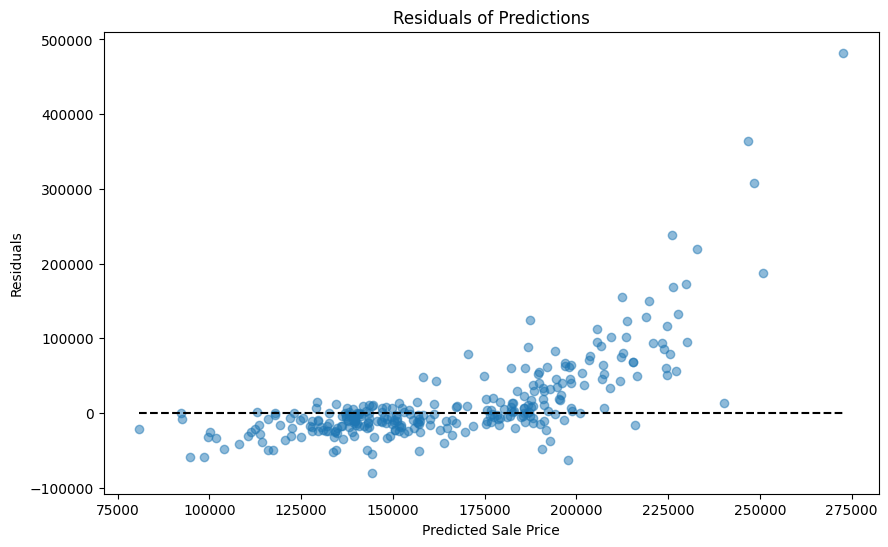

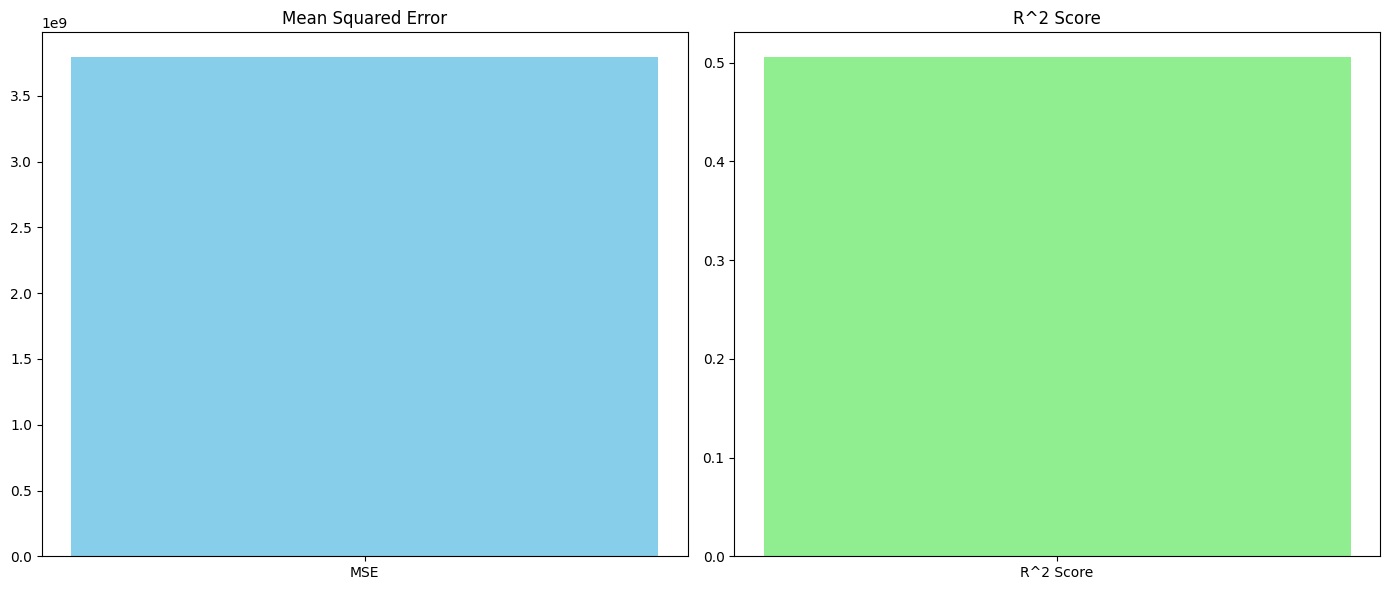

In [48]:
"""# Split your data
X = selectedData.drop('SalePrice', axis=1)
y = selectedData['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a full pipeline with SVM
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('svm', SVR())])

# Train the model
full_pipeline.fit(X_train, y_train)

# Evaluate the model
print(full_pipeline.score(X_test, y_test))"""



"""

# Split the dataset into features and target variable
X = selectedData.drop('SalePrice', axis=1)
y = selectedData['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that scales the features and then applies SVR
svr_pipeline = make_pipeline(StandardScaler(), SVR(C=1.0, kernel='rbf', gamma='scale'))

# Train the SVR model
svr_pipeline.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svr_pipeline.predict(X_test)
#print(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f"Mean Squared Error: {mse}")
#print(f"R^2 Score: {r2}")



# Assuming y_test and y_pred are defined from your model's predictions

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Sale Prices')
plt.show()

# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()

# Plot Evaluation Metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Mean Squared Error (MSE)
ax[0].bar('MSE', mse, color='skyblue')
ax[0].set_title('Mean Squared Error')

# R^2 Score
ax[1].bar('R^2 Score', r2, color='lightgreen')
ax[1].set_title('R^2 Score')

plt.tight_layout()
plt.show()"""



# Adjust the categorical transformer to bypass boolean columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Adjust preprocessing to convert boolean columns to integers before any imputation
# This is a simple function that can be applied to boolean columns
def preprocess_boolean(df):
    bool_cols = df.select_dtypes(include=['bool']).columns
    df[bool_cols] = df[bool_cols].astype(int)  # Convert boolean columns to integers
    return df

# Apply the boolean preprocessing to X_train and X_test
X_train = preprocess_boolean(X_train)
X_test = preprocess_boolean(X_test)

# Now, redefine the column transformers with updated column types
numerical_cols = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns  # Include int32 if bools were converted
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns  # Ensure 'bool' is not included

# Preprocessor definition remains the same
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Continue with pipeline and GridSearchCV as before


# Creating a pipeline that includes preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', SVR())])

# Parameter grid for SVR
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['rbf', 'linear'],
    'model__gamma': ['scale', 'auto'],
    'model__epsilon': [0.1, 0.2, 0.5]
}

# Setup the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fitting the grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices')
plt.show()

# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', linestyles='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()

# Evaluation Metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Mean Squared Error (MSE)
ax[0].bar('MSE', mse, color='skyblue')
ax[0].set_title('Mean Squared Error')

# R^2 Score
ax[1].bar('R^2 Score', r2, color='lightgreen')
ax[1].set_title('R^2 Score')

plt.tight_layout()
plt.show()
